# Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Read CSV File

In [2]:
df = pd.read_csv("Covid.csv")

In [3]:
df.head()

,Unnamed: 0,1,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,...,Source_2,Source_3,Backup Notes,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2.0,1.0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,...,https://weather.com/en-IN/india/news/news/2020...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3.0,2.0,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4.0,3.0,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.0,4.0,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Extract Gender , State and Age Column From DataSet

In [4]:
sub_df = df[["Gender","Detected State","Age Bracket"]]

In [5]:
sub_df.head()

,Gender,Detected State,Age Bracket
0,NaN,NaN,NaN
1,F,Kerala,20
2,NaN,Kerala,NaN
3,NaN,Kerala,NaN
4,M,Delhi,45


In [6]:
sub_df.shape

(2072, 3)

# Drop NA Values

In [7]:
sub_df.dropna(subset = ['Detected State','Gender'],inplace=True)

C:\Users\Vineet Rai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
#sub_df["Gender"] = df["Gender"].apply(Lamba x:1 if x == "M" else 0)

In [9]:
sub_df.head()

,Gender,Detected State,Age Bracket
1,F,Kerala,20
4,M,Delhi,45
5,M,Telangana,24
6,M,Rajasthan,69
21,F,Rajasthan,70


In [10]:
sub_df["Age Bracket"].fillna('0',inplace =True)

C:\Users\Vineet Rai\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
def assign_age(x):
    if len(x)>3:
        x1,x2 = x.split('-')
        return str((int(x1)+int(x2))/2).split('.')[0]
    else:
        return x

In [12]:
sub_df['Age Bracket'] = sub_df["Age Bracket"].apply(assign_age)

C:\Users\Vineet Rai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
# Change Age Column to int type and replace NA Values in Age column with Mean

In [14]:
sub_df["Age Bracket"] = sub_df['Age Bracket'].astype(int)

C:\Users\Vineet Rai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 1 to 1663
Data columns (total 3 columns):
Gender            742 non-null object
Detected State    742 non-null object
Age Bracket       742 non-null int32
dtypes: int32(1), object(2)
memory usage: 20.3+ KB


In [16]:
age_mean = int(sub_df[sub_df["Age Bracket"]!=0]['Age Bracket'].mean())

In [17]:
sub_df["Age Bracket"].replace(0,age_mean,inplace=True)

C:\Users\Vineet Rai\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [18]:
sub_df.head()

,Gender,Detected State,Age Bracket
1,F,Kerala,20
4,M,Delhi,45
5,M,Telangana,24
6,M,Rajasthan,69
21,F,Rajasthan,70


# Visualization of Data

Text(0.5, 1.0, 'Average Age of affected Males/Females in all states in india')

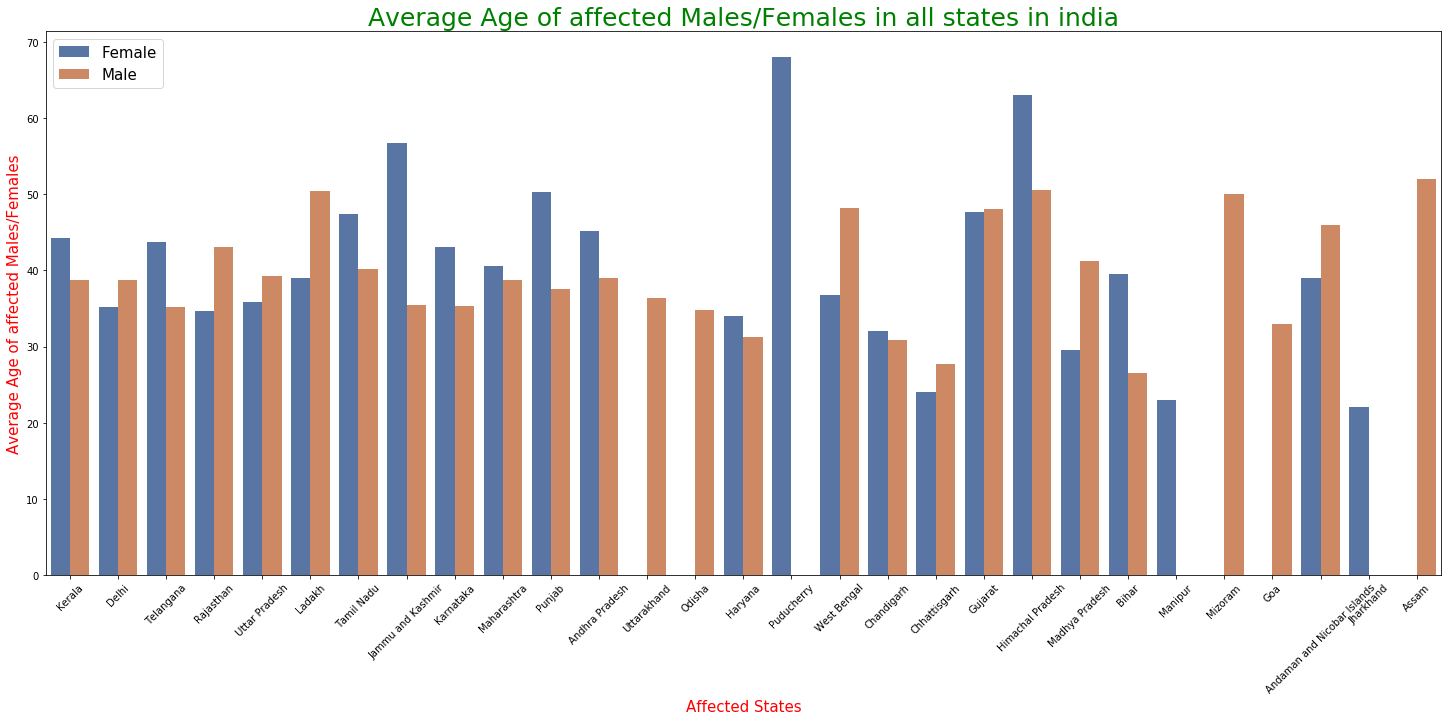

In [23]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=45)
sns.barplot(x="Detected State",y="Age Bracket",data=sub_df,hue='Gender',ci=None,
palette="deep")
plt.legend(["Female","Male"],prop={'size':15})
plt.xlabel("Affected States",fontdict={"Size":15},color="red")
plt.ylabel("Average Age of affected Males/Females",fontdict={"size":15},color="red")
plt.title("Average Age of affected Males/Females in all states in india",
fontdict={"size":25},color="green")
#Text(0.5, 1.0, 'Average Age of affected Males/Females in all states in india')

This barplot shows the largest age affected female in punduchery (68) and male in assam (50).
Average age of affected males and females near about 45.


In kerala we can see mostly affected females are around 45 years amd males are around 38 year so 
we can say affected males are younger compartively females. 